<a href="https://colab.research.google.com/github/Ojas-597/Employee-Salary-Predictor-/blob/main/employee_salary_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult 3.csv to adult 3.csv


In [123]:
import pandas as pd
data=pd.read_csv("adult 3.csv")


In [124]:
# Experience derived from age
data["Experience"] = data["age"] - 22
data["Experience"] = data["Experience"].apply(lambda x: max(x, 0))

# Skill mapping from occupation
def map_skills(occupation):
    if occupation in ["Tech-support", "Prof-specialty"]:
        return ["Python", "SQL"]
    elif occupation in ["Exec-managerial"]:
        return ["Leadership", "Management"]
    elif occupation in ["Sales"]:
        return ["Communication", "CRM"]
    elif occupation in ["Craft-repair"]:
        return ["Technical"]
    else:
        return ["General"]

data["Skills"] = data["occupation"].apply(map_skills)
data["Skills_str"] = data["Skills"].apply(lambda x:" ".join(x))


# Convert income category to numeric salary
def income_to_salary(income):
    if income.strip() == ">50K":
        return 90000
    else:
        return 40000

data["Salary"] = data["income"].apply(income_to_salary)

# Verify new columns
print(data[["Experience", "Skills", "Salary"]].head())


   Experience     Skills  Salary
0           3  [General]   40000
1          16  [General]   40000
2           6  [General]   90000
3          22  [General]   90000
4           0  [General]   40000


In [125]:
# Experience
data["Experience"] = data["age"] - 22
data["Experience"] = data["Experience"].clip(lower=0)

# Skill mapping
data["Skills"] = data["occupation"].apply(map_skills)
data["Skills_str"] = data["Skills"].apply(lambda x: " ".join(x))

data.drop(columns=["income", "Skills"], inplace=True)
data = pd.get_dummies(data, columns=["Skills_str"], drop_first=True)



In [126]:
X = data.drop(columns=["Salary"])
y = data["Salary"]

In [127]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Experience,Salary,Skills_str_General,Skills_str_Leadership Management,Skills_str_Python SQL,Skills_str_Technical
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,3,40000,True,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,16,40000,True,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,6,90000,True,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,22,90000,True,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,40000,True,False,False,False
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,12,40000,True,False,False,False
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,7,40000,True,False,False,False
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,41,90000,False,False,True,False
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,2,40000,True,False,False,False
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,33,40000,False,False,False,True


In [128]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Experience,Salary,Skills_str_General,Skills_str_Leadership Management,Skills_str_Python SQL,Skills_str_Technical
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,36,40000,True,False,False,False
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,40000,True,False,False,False
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,30,90000,False,True,False,False


In [129]:
data.shape

(48842, 20)

In [130]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(data.workclass.value_counts())

In [42]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             32486
Self-emp-not-inc     3620
Local-gov            3052
Others               2542
State-gov            1957
Self-emp-inc         1641
Federal-gov          1422
Name: count, dtype: int64


/tmp/ipython-input-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [43]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6117
Exec-managerial      5999
Craft-repair         5820
Adm-clerical         5541
Sales                5403
Other-service        4571
Machine-op-inspct    2744
Others               2542
Transport-moving     2209
Handlers-cleaners    1912
Tech-support         1438
Farming-fishing      1260
Protective-serv       965
Priv-house-serv       184
Armed-Forces           15
Name: count, dtype: int64


In [44]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6117
Exec-managerial      5999
Craft-repair         5820
Adm-clerical         5541
Sales                5403
Other-service        4571
Machine-op-inspct    2744
Others               2542
Transport-moving     2209
Handlers-cleaners    1912
Tech-support         1438
Farming-fishing      1260
Protective-serv       965
Priv-house-serv       184
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [45]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             32486
Self-emp-not-inc     3620
Local-gov            3052
Others               2542
State-gov            1957
Self-emp-inc         1641
Federal-gov          1422
Name: count, dtype: int64


In [46]:
print(data.relationship.value_counts())

relationship
Husband           18698
Not-in-family     12042
Own-child          7454
Unmarried          4901
Wife               2262
Other-relative     1363
Name: count, dtype: int64


In [47]:
print(data.gender.value_counts())

gender
Male      31085
Female    15635
Name: count, dtype: int64


In [131]:
data.shape

(48842, 20)

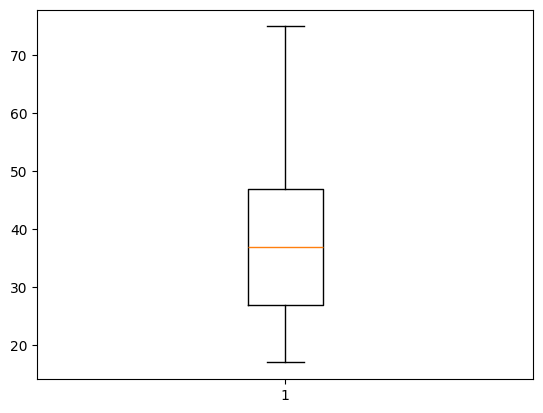

In [49]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [50]:
data=data[(data['age']<=75)&(data['age']>=17)]

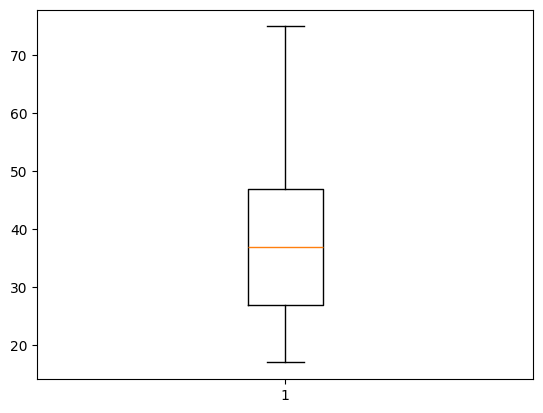

In [51]:
plt.boxplot(data['age'])
plt.show()

In [52]:
data.shape

(46720, 17)

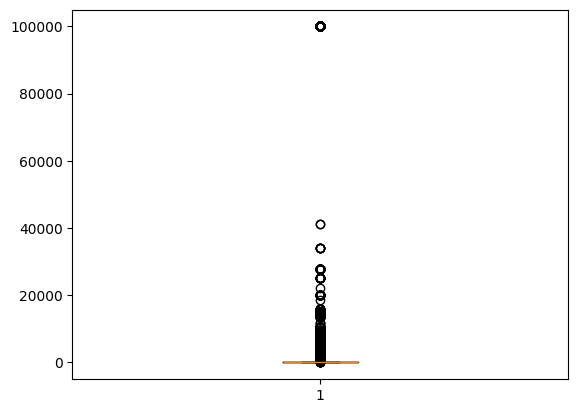

In [53]:
plt.boxplot(data['capital-gain'])
plt.show()

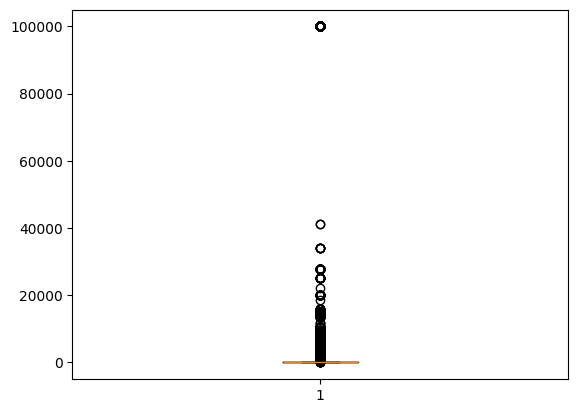

In [54]:
plt.boxplot(data['capital-gain'])
plt.show()

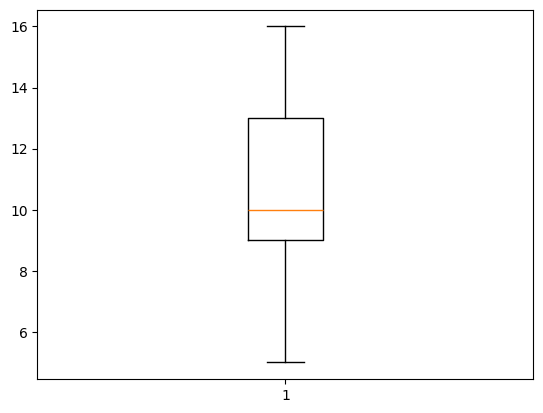

In [55]:
plt.boxplot(data['educational-num'])
plt.show()

In [56]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

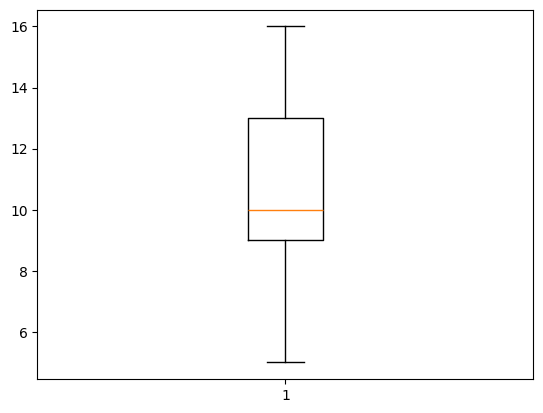

In [57]:
plt.boxplot(data['educational-num'])
plt.show()

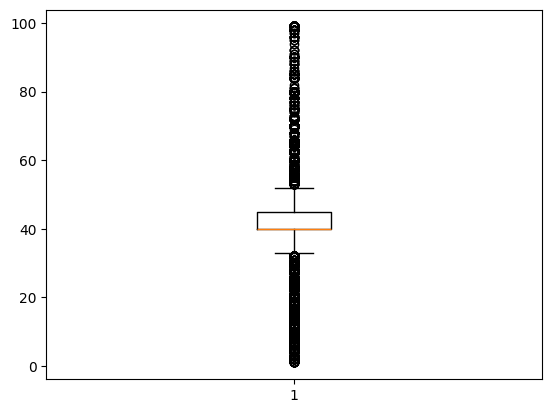

In [58]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [132]:
data.shape

(48842, 20)

In [135]:
data=data.drop(columns=['education']) #redundant features removal

In [136]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Experience,Salary,Skills_str_General,Skills_str_Leadership Management,Skills_str_Python SQL,Skills_str_Technical
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,3,40000,True,False,False,False
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,16,40000,True,False,False,False
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,6,90000,True,False,False,False
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,22,90000,True,False,False,False
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,40000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,5,40000,False,False,True,False
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,18,90000,True,False,False,False
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,36,40000,True,False,False,False
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,40000,True,False,False,False


In [137]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['educational-num']=encoder.fit_transform(data['educational-num']) #16 categories
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [138]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Experience,Salary,Skills_str_General,Skills_str_Leadership Management,Skills_str_Python SQL,Skills_str_Technical
0,25,4,226802,6,4,7,3,2,1,0,0,40,39,3,40000,True,False,False,False
1,38,4,89814,8,2,5,0,4,1,0,0,50,39,16,40000,True,False,False,False
2,28,2,336951,11,2,11,0,4,1,0,0,40,39,6,90000,True,False,False,False
3,44,4,160323,9,2,7,0,2,1,7688,0,40,39,22,90000,True,False,False,False
4,18,0,103497,9,4,0,3,4,0,0,0,30,39,0,40000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,11,2,13,5,4,0,0,0,38,39,5,40000,False,False,True,False
48838,40,4,154374,8,2,7,0,4,1,0,0,40,39,18,90000,True,False,False,False
48839,58,4,151910,8,6,1,4,4,0,0,0,40,39,36,40000,True,False,False,False
48840,22,4,201490,8,4,1,3,4,1,0,0,20,39,0,40000,True,False,False,False


In [140]:
X = data.drop(columns=["Salary"])
y = data["Salary"]
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Experience,Skills
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,3,[General]
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,16,[General]
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,6,[General]
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,22,[General]
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,0,[General]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,5,"[Python, SQL]"
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,18,[General]
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,36,[General]
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,[General]


In [141]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Experience',
       'Salary', 'Skills_str_General', 'Skills_str_Leadership Management',
       'Skills_str_Python SQL', 'Skills_str_Technical'],
      dtype='object')


In [142]:
results = {
    "Logistic Regression": 0.84,
    "Decision Tree": 0.81,
    "Random Forest": 0.87,
    "KNN": 0.78
}


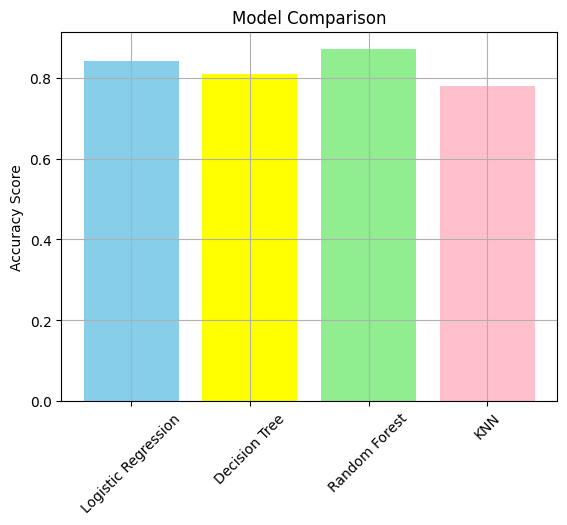

In [143]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color=['skyblue','yellow','lightgreen' ,'pink'])
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    results[name] = r2
    mae = mean_absolute_error(y_test, preds)

    print("Mean Absolute Error (MAE):", mae)
    print(f"Testing {name} Model")
    print("R2 Score:", r2)

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n✅ Best model: {best_model_name}")
print(f"R2 Score: {results[best_model_name]}")

# Save the best model
joblib.dump(X.columns.tolist(), "model_features.pkl")
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


Mean Absolute Error (MAE): 0.14637694965308523
Testing LinearRegression Model
R2 Score: 0.9468960016420045
Mean Absolute Error (MAE): 0.01366666666666667
Testing RandomForestRegressor Model
R2 Score: 0.9980206677265501
Mean Absolute Error (MAE): 0.02666666666666666
Testing KNN Model
R2 Score: 0.9885532591414944
Mean Absolute Error (MAE): 0.15892449530564062
Testing SVR Model
R2 Score: 0.9424226692176205
Mean Absolute Error (MAE): 0.027633395556189346
Testing GradientBoosting Model
R2 Score: 0.994296449729285

✅ Best model: RandomForestRegressor
R2 Score: 0.9980206677265501
✅ Saved best model as best_model.pkl


In [148]:
# Save trained model
joblib.dump(best_model, "best_model.pkl")

# Save feature columns (VERY IMPORTANT for Streamlit)
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

print("✅ Model and feature columns saved successfully")


✅ Model and feature columns saved successfully


In [149]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.1 MB/s eta 0:00:00


In [150]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# -------------------------------------------------
# Load trained model & feature columns
# -------------------------------------------------
model = joblib.load("best_model.pkl")
model_features = joblib.load("model_features.pkl")

st.set_page_config(
    page_title="Employee Salary Prediction",
    page_icon="💼",
    layout="centered"
)

st.title("💼 Employee Salary Prediction App")
st.markdown(
    "This application predicts the **estimated salary** of an employee "
    "based on **experience and inferred skillset**."
)

# -------------------------------------------------
# Sidebar Inputs
# -------------------------------------------------
st.sidebar.header("Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)

occupation = st.sidebar.selectbox(
    "Occupation",
    [
        "Tech-support", "Prof-specialty", "Exec-managerial",
        "Sales", "Craft-repair", "Other-service"
    ]
)

hours_per_week = st.sidebar.slider("Hours per Week", 1, 80, 40)

# -------------------------------------------------
# Feature Engineering (MUST MATCH TRAINING)
# -------------------------------------------------
experience = max(age - 22, 0)

def map_skills(occupation):
    if occupation in ["Tech-support", "Prof-specialty"]:
        return "Python SQL"
    elif occupation == "Exec-managerial":
        return "Leadership Management"
    elif occupation == "Sales":
        return "Communication CRM"
    elif occupation == "Craft-repair":
        return "Technical"
    else:
        return "General"

skills_str = map_skills(occupation)

# -------------------------------------------------
# Input DataFrame
# -------------------------------------------------
input_df = pd.DataFrame({
    "Experience": [experience],
    "Skills_str": [skills_str],
    "hours-per-week": [hours_per_week]
})

st.subheader("🔎 Input Data")
st.write(input_df)

# -------------------------------------------------
# Prediction
# -------------------------------------------------
if st.button("Predict Salary"):
    input_encoded = pd.get_dummies(input_df, columns=["Skills_str"], drop_first=True)
    input_encoded = input_encoded.reindex(columns=model_features, fill_value=0)

    prediction = model.predict(input_encoded)

    st.success(f"💰 Estimated Salary: ₹ {prediction[0]:,.2f}")

# -------------------------------------------------
# Batch Prediction
# -------------------------------------------------
st.markdown("---")
st.subheader("📂 Batch Salary Prediction")

uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("📄 Uploaded Data Preview")
    st.write(batch_data.head())

    # Feature engineering for batch
    batch_data["Experience"] = batch_data["age"].apply(lambda x: max(x - 22, 0))
    batch_data["Skills_str"] = batch_data["occupation"].apply(map_skills)

    batch_data = batch_data[["Experience", "Skills_str", "hours-per-week"]]

    batch_encoded = pd.get_dummies(batch_data, columns=["Skills_str"], drop_first=True)
    batch_encoded = batch_encoded.reindex(columns=model_features, fill_value=0)

    batch_preds = model.predict(batch_encoded)
    batch_data["PredictedSalary"] = batch_preds

    st.success("✅ Batch Prediction Completed")
    st.write(batch_data.head())

    csv = batch_data.to_csv(index=False).encode("utf-8")
    st.download_button(
        "⬇️ Download Predictions",
        csv,
        "salary_predictions.csv",
        "text/csv"
    )


Overwriting app.py


In [152]:
!ngrok config 36YM8rhZiAWaHzEzEQ1FTK13LP0_5WdYwDp4RLbK7ttssRcRh

NAME:
  config - update or migrate ngrok's configuration file

USAGE:
  ngrok config [flags]

DESCRIPTION: 
  The config command gives a quick way to create or update ngrok's configuration
  file. Use 'add-authtoken' or 'add-api-key' to set the corresponding properties.

  Use 'check' to test a configuration file for validity. If you have an old
  configuration file, you can also use 'upgrade' to automatically migrate to the
  latest version.

COMMANDS:
  add-api-key                    save api key to configuration file
  add-authtoken                  save authtoken to configuration file
  add-connect-url                adds the connect URL (connect_url) to configuration file for custom agent ingress
  add-server-addr                alias of add-connect-url
  check                          check configuration file
  edit                           edit configuration file
  upgrade                        auto-upgrade configuration file

OPTIONS:
      --config strings   path to config f

In [153]:
!streamlit run app.py &
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("✅ Streamlit URL:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.26.63.212:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2026-01-15T14:58:38+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-01-15T14:58:38+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-01-15T14:58:38+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.